In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [44]:
dataset = pd.read_csv('./dataset.csv')

In [45]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [49]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

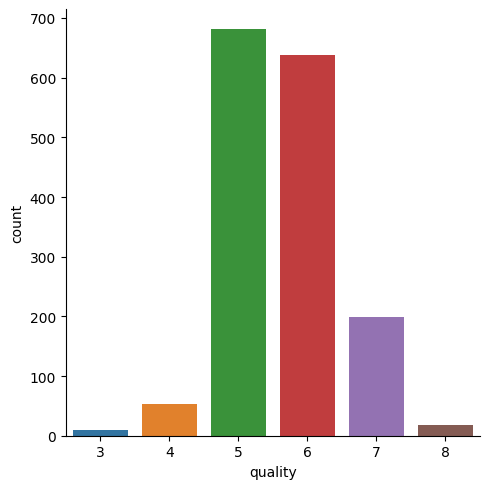

In [50]:
sns.catplot(data=dataset, x='quality', kind='count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

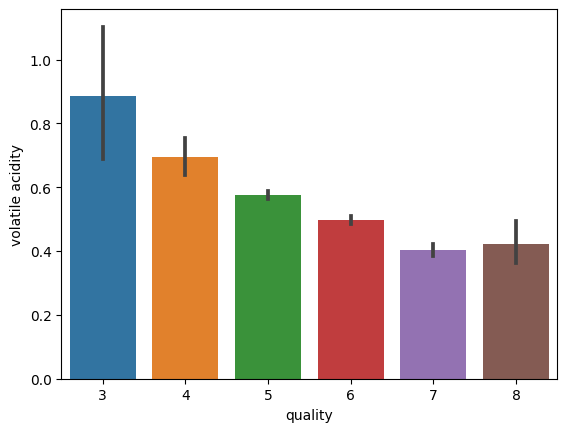

In [51]:
sns.barplot(data=dataset, x='quality', y='volatile acidity')

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

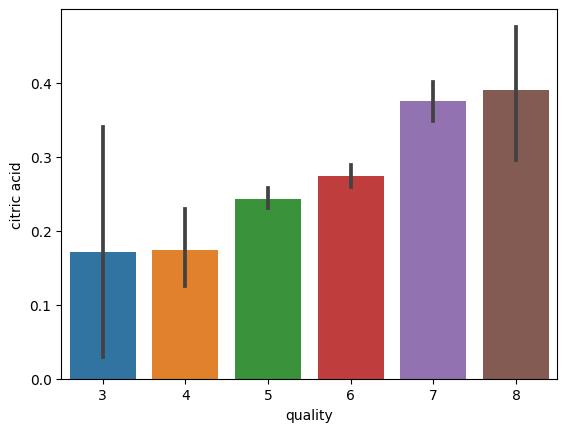

In [52]:
sns.barplot(data=dataset, x='quality', y='citric acid')

<AxesSubplot: >

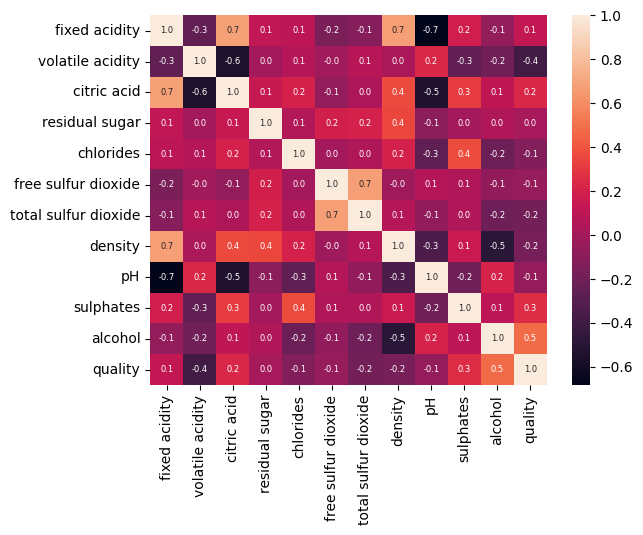

In [53]:
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, fmt='.1f', annot_kws={'size': 6})

In [54]:
dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [55]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
models = {
    'LogisticRegression' : LogisticRegression(max_iter=1000),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'GaussianNB' : GaussianNB(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier()
}
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [100, 300, 500, 800, 1000],
        'max_depth': [10, 20, 30, None]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GaussianNB': {}
}

for key, value in models.items():
    grid_search = GridSearchCV(estimator=value, param_grid=param_grids[key],cv=10, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X=X_train, y=y_train)
    print(f'{key}({grid_search.best_params_}): {grid_search.best_score_}')

/Users/ayushrajsingh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression({'C': 10}): 0.8819328248031496
KNeighborsClassifier({'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}): 0.8920952263779528
SVC({'C': 1, 'gamma': 'auto'}): 0.8788201279527559
GaussianNB({}): 0.8373954232283465
DecisionTreeClassifier({'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}): 0.8835014763779527
RandomForestClassifier({'max_depth': 20, 'n_estimators': 300}): 0.9007197342519685


In [62]:
model = RandomForestClassifier(max_depth=20, n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [63]:
y_pred = model.predict(X_test)

In [64]:
acc = accuracy_score(y_pred=y_pred, y_true=y_test)
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(f'Accuracy : {acc}')
print(f'Confusion Matrix :\n{cm}')

Accuracy : 0.93125
Confusion Matrix :
[[268   7]
 [ 15  30]]
